In [1]:
# Mac を使っている方は、以下のパッケージが必要になる場合があります。
# !brew install cmake gcc 
# pipを使って、以下のパッケージをインストールしてください。
# !pip install u8darts

In [2]:
from pathlib import Path
import pandas as pd

In [3]:
data_dir = Path("./data/")

<Axes: xlabel='Month'>

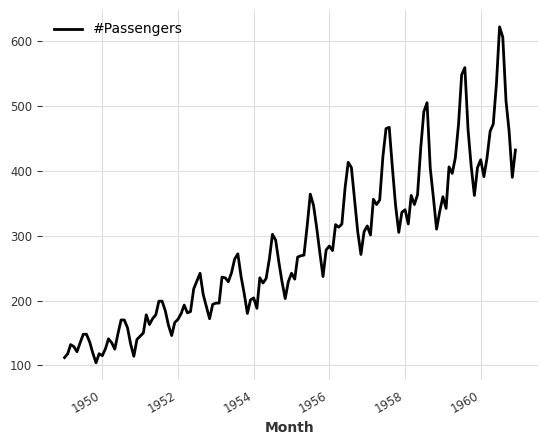

In [12]:
AirPassengersDataset().load().plot()

<Axes: xlabel='Month'>

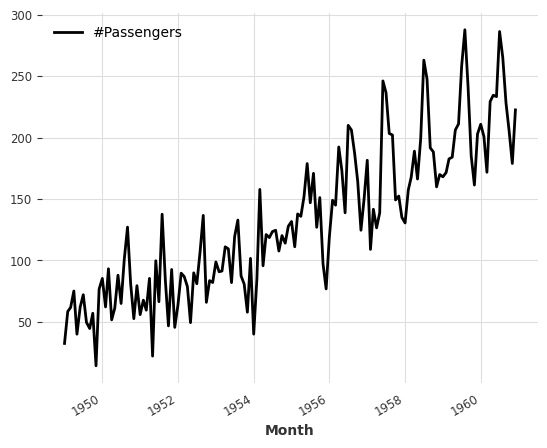

In [4]:
import numpy as np
from darts.datasets import AirPassengersDataset
from darts.timeseries import TimeSeries
series = AirPassengersDataset().load()
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
series = (series / 2 + 20 * series_noise - 10)
series.plot()

In [6]:
series.pd_dataframe()["#Passengers"]

Month
1949-01-01     32.421047
1949-02-01     58.363670
1949-03-01     61.722861
1949-04-01     75.111831
1949-05-01     39.960291
                 ...    
1960-08-01    265.048092
1960-09-01    228.224410
1960-10-01    205.508922
1960-11-01    178.900333
1960-12-01    222.510633
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

In [14]:
new_df = df.tail(144)

In [17]:
new_df['visitors'] = series.pd_dataframe()["#Passengers"].values

/var/folders/kp/lzgg21x57pz4pck1wp24d7fm0000gp/T/ipykernel_47825/2234153063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['visitors'] = series.pd_dataframe()["#Passengers"].values


,date,weather,temperature,visitors
175,2022-12-27,曇り,-16.398444,74.10
176,2022-12-28,雨,-11.791074,74.10
177,2022-12-29,雨,-10.565454,73.45
178,2022-12-30,曇り,-15.757437,72.80
179,2022-12-31,曇り,-13.071429,73.45


In [7]:
df = pd.read_csv(data_dir / "visitors.csv")

In [8]:
df.head()

,date,weather,temperature,visitors
0,2022-07-05,曇り,27.149158,49.0
1,2022-07-06,曇り,30.004178,40.0
2,2022-07-07,曇り,25.806918,31.0
3,2022-07-08,曇り,23.213714,30.0
4,2022-07-09,曇り,27.302525,29.0


In [18]:
df = new_df

In [19]:
df[["date", "visitors"]].head()

,date,visitors
36,2022-08-10,32.421047
37,2022-08-11,58.363670
38,2022-08-12,61.722861
39,2022-08-13,75.111831
40,2022-08-14,39.960291


<Axes: xlabel='date'>

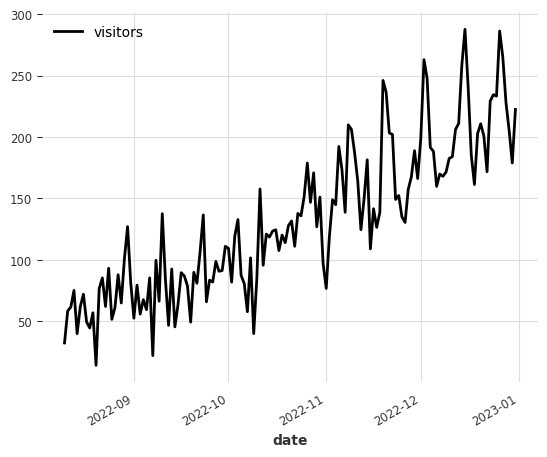

In [20]:
from darts.timeseries import TimeSeries
series = TimeSeries.from_dataframe(df, time_col="date", value_cols="visitors")
series.plot()

In [21]:
from darts.models import AutoARIMA

model = AutoARIMA()
model.fit(series)

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


AutoARIMA(add_encoders=None)

In [29]:
from darts.models import ExponentialSmoothing

In [30]:
model = ExponentialSmoothing()
model.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [31]:
prediction = model.predict(20)

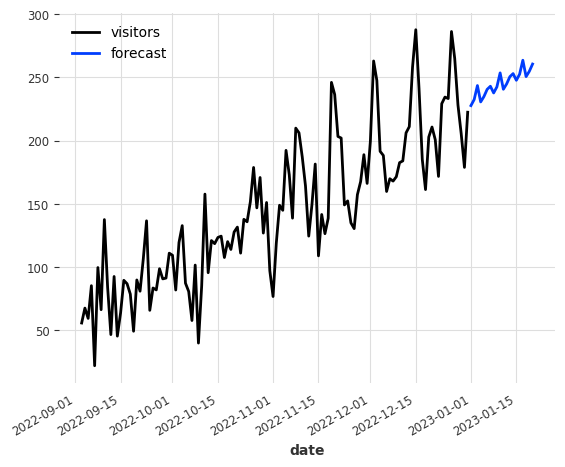

In [34]:
import matplotlib.pyplot as plt

series[-120:].plot()
prediction.plot(label="forecast")
plt.legend()

<Axes: xlabel='date'>

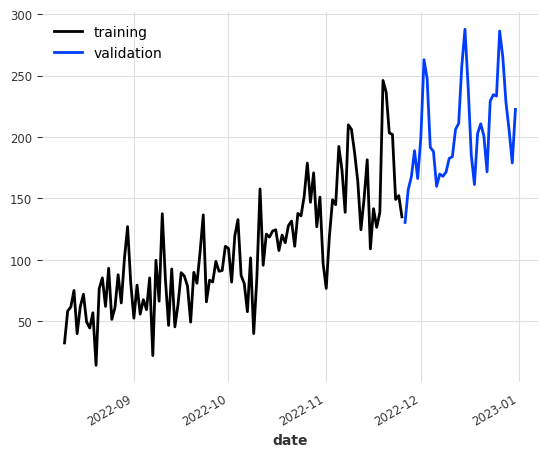

In [24]:
train, val =  series[:-36], series[-36:]
train.plot(label="training")
val.plot(label="validation")

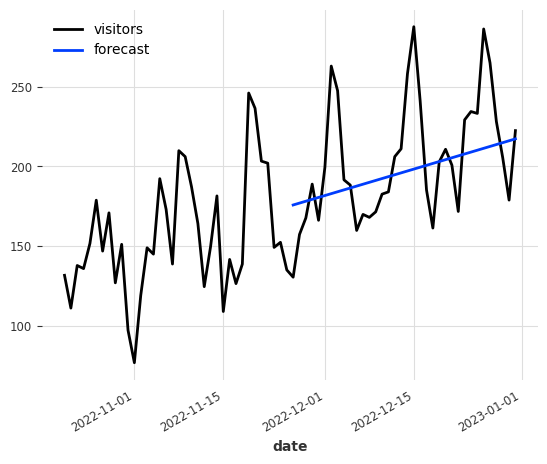

In [25]:
from darts.models import AutoARIMA

model = AutoARIMA()
model.fit(train)

prediction = model.predict(36)
series[-72:].plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [16]:
from darts.metrics.metrics import mape
mape(prediction, val)

12.969174534020716